<h1><center> Marketing customer analysis  

### Ironhack first week regression analysis!</center></h1>

A First Regression model after the first week @ Ironhack based on marketing costumer analysis data provided for the fulltime bootcamp at Ironhack. This notebook is ment o be shared among other participants first and foremost to accelerate learningor to start a discussion.  
<center >FEEDBACK IS HIGHLY APPRECIATED!</center>

Functions in this jupyter notebook have been writen by myself if in the code below using the content learned in the first week of Ironhack and mostly stackoverflow.  

The first block of funcitons is used for correlation analysis of categoricals, which was new to me, sources are cited
      
### 0. Introduction
    
The data provided does not come with a desciption of variables, but the varibles are very well named. Apparently the data contains customers of a car insurance company, described by 24 columns. The task is to predict the  future claim amount of customers by building a regression model based on the other given variables. By definition data cleaning, -exploring and -processing is done on the whole dataset for learning purposes. The spliting of the datased for validation purposes is done late just before fiting the model(s). 

We start by having a look at the data and importing all necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

data.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [2]:
#SKIP!
#This block is for calculating correlations between categoricals, it contains functions that I didn't write myself

#calculation of eta
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

#this function I did get from kaggle, they are needed to do the categorial correlation using cramers
#https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = False, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     - Pearson's R for continuous-continuous cases
     - Correlation Ratio for categorical-continuous cases
     - Cramer's V or Theil's U for categorical-categorical cases
    :param dataset: NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    :param nominal_columns: string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    :param mark_columns: Boolean (default: False)
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    :param theil_u: Boolean (default: False)
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    :param plot: Boolean (default: True)
        If True, plot a heat-map of the correlation matrix
    :param return_results: Boolean (default: False)
        If True, the function will return a Pandas DataFrame of the computed associations
    :param kwargs:
        Arguments to be passed to used function and methods
    :return: Pandas DataFrame
        A DataFrame of the correlation/strength-of-association between all features
    """
    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(10,10))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), vmin=-1, vmax=1, fmt=kwargs.get('fmt','.2f'), cmap='seismic')
        plt.show()
    if return_results:
        return corr

## 1. Exploratory data analysis  
### 1.1Overview
The dataset coontains 9134 rows and 24 features/variables.  
Total_claim_amount is the target to predict. 

The variable names are a little long, so we process them with this function and limit them to 9 letters. We further store the variable names as a descitpion in a list:


In [3]:
var_desc = data.columns

In [4]:
data = data.rename(columns={ 'Customer':'id',
                            'Months Since Last Claim' : 'month_cla',
                             'Months Since Policy Inception' : 'month_inc',
                            'Number of Open Complaints':'numb_comp',
                            'Number of Policies':'numb_poli'})                     

In [5]:
def cols_name(df, max_cols_letters):
    """function for standardizing and shortening the columns names of a dataframe df \n
    2 arguments needed: dataframe and maximum letters for the columns names \n
    replaces spaces with underscore and makes all lowercase, shortens the columns name to a maximum number of letters
    e.g Customer Lifetime value --> customer_lif.."""
    cols = df.columns
    new_column_names =[]
    for col in cols:
        new_col = col.lower().replace (" ", "_")
        new_col = (new_col[:max_cols_letters]) if len(new_col) > max_cols_letters else new_col
        new_column_names.append(new_col)
    df.columns = new_column_names
    return df

cols_name(data, 9)
data = data.rename(columns={ 'customer':'id',
                            'num':'median_home_val', 'ic1':'median_household_income'})
feature_names = data.columns
print(data.columns)

Index(['id', 'state', 'customer_', 'response', 'coverage', 'education',
       'effective', 'employmen', 'gender', 'income', 'location_', 'marital_s',
       'monthly_p', 'month_cla', 'month_inc', 'numb_comp', 'numb_poli',
       'policy_ty', 'policy', 'renew_off', 'sales_cha', 'total_cla',
       'vehicle_c', 'vehicle_s'],
      dtype='object')


The variable names are nice and short, code should be easier to read now. We further replaced 'customer' with 'id' as it is confusing with customer_lifetimer_value, ('customer_'). In the same manner we proceed with var starting with 'number_of". Please not that our target now is named 'total_cla' for `total_claim_amount`. When describing the steps in this notebook we will further use the whole name `total_claim_amount`. In the same manner we use the whole name for each feature in the text (e.g. `customer_lifetimer_value` for `customer_`)


### 1.2 Data cleaning and missing Values
Here"s a function that shows the number of missing values for each feature compared to the total amount/len of the column if there are any. Apparently there are nor missing values:

In [6]:
def display_missing(df):
    """shows the number of missing values of each column for a date_frame, if there is one"""
    for col in df.columns.tolist():
        if df[col].isnull().sum():
            print('{} column missing values: {}/{}'.format(col, df[col].isnull().sum(), len(df)))
    print ('Done checking for missing values')
    
display_missing(data)
#no missing values

Done checking for missing values


In [7]:
data = data.drop_duplicates('id')

### 1.3 Target Distribution

As shown below there is a pretty huge gap between  mean and median of `total_claim_amount`. When looking at the boxplot we see that we have some outliers, respectively our target variable is not normally distributed. However the max still seems within a reasonable range (not higher then to the power of ten, so there is no need to drop some rows for extreme outliers. The whole curve is strongly shifted to the right (see distplot - Distirbution of SalePrice), it has a right skew, indicated by the probability plot. At the upper end we see two, maybe four points that are a little separated from the others - maybe we can have a closer look at these during data manipulation. In any case a transformation of the variable seems to be highly recommended.

data Total Claim Amount Mean: 434.0887943128942
data Total Claim Amount Median: 383.94543350000004
data Total Claim Amount Max: 2893.239678
data Total Claim Amount Skew: 1.7149658097209557


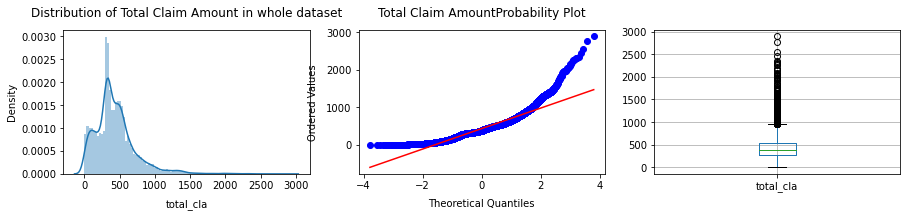

In [8]:
print('data Total Claim Amount Mean: {}'.format(data['total_cla'].mean()))
print('data Total Claim Amount Median: {}'.format(data['total_cla'].median()))
print('data Total Claim Amount Max: {}'.format(data['total_cla'].max()))
print('data Total Claim Amount Skew: {}'.format(data['total_cla'].skew()))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,2))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None)

sns.distplot(data['total_cla'], hist=True, bins = 100, ax=ax1)
probplot(data['total_cla'], plot=ax2)
data.boxplot('total_cla', ax=ax3)

ax1.set_xlabel('total_cla', size=10, labelpad=8)
ax2.set_xlabel('Theoretical Quantiles', size=10, labelpad=8)
ax2.set_ylabel('Ordered Values', size=10, labelpad=8)

ax1.set_title('Distribution of Total Claim Amount in whole dataset', size=12, y=1.05)
ax2.set_title('Total Claim AmountProbability Plot', size=12, y=1.05)

plt.show()

### 1.4 Data Types

Next we have a look at the data types, and especially if the categorical variables are really categoricals and not nuericals with some strings in them. Further we have a look if among the categoricals are some ordinal categoricals. We use a function that returns a dataframe with the type of variables.

In [9]:
def cols_dtype(df):
    """returns data types of columns of a dataframe in form of a dataframe, the values beeing the feature/variable names"""
    categoricals = df.select_dtypes(include='object').columns
    numerics = df.select_dtypes(exclude='object').columns
    booleans = df.select_dtypes(include='bool').columns
    floats = df.select_dtypes(include='float').columns
    integers = df.select_dtypes(include='int').columns
    data_types = pd.DataFrame([categoricals,numerics, booleans, floats, integers])
    data_types = data_types.T
    data_types.columns=['catergoricals or mixed', 'nuermicals', 'booleans','floats', 'integers']
    return data_types

cols_dtype(data)

,catergoricals or mixed,nuermicals,booleans,floats,integers
0,id,customer_,None,customer_,None
1,state,income,None,total_cla,None
2,response,monthly_p,None,None,None
3,coverage,month_cla,None,None,None
4,education,month_inc,None,None,None
5,effective,numb_comp,None,None,None
6,employmen,numb_poli,None,None,None
7,gender,total_cla,None,None,None
8,location_,None,None,None,None
9,marital_s,None,None,None,None


`vehicle size` is an ordinal disitributed categorical, with most values at medsize and lowest at the large size. The LabelEncoder labels the vlaues lexicographically, so in this case the ordinal encoder makes more sense as it allows to give a list of categories[i] that are then encoded in the sequenece of the list.

In [10]:
data.vehicle_s.value_counts()


Medsize    6424
Small      1764
Large       946
Name: vehicle_s, dtype: int64

`effective_to_date` is a time related variable and must be further processed, maybe itis of use in feature engeneering. In the first model however we won't deal with that, but maybe for later models to improove!

In [11]:
nums = data.select_dtypes(exclude='object')
numcols= list(nums.columns)
print('numcols:',numcols)

cats = data.select_dtypes(include='object')
cats.drop('id', inplace=True, axis=1)
catcols= list(cats.columns)
print('catcols:',catcols)

numcols: ['customer_', 'income', 'monthly_p', 'month_cla', 'month_inc', 'numb_comp', 'numb_poli', 'total_cla']
catcols: ['state', 'response', 'coverage', 'education', 'effective', 'employmen', 'gender', 'location_', 'marital_s', 'policy_ty', 'policy', 'renew_off', 'sales_cha', 'vehicle_c', 'vehicle_s']


In [12]:
data.head()

,id,state,customer_,response,coverage,education,effective,employmen,gender,income,location_,marital_s,monthly_p,month_cla,month_inc,numb_comp,numb_poli,policy_ty,policy,renew_off,sales_cha,total_cla,vehicle_c,vehicle_s
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1.5 Correlation

For the correlation we only looked at numerical variables and the correlation between them. In total there are three cases we have to llok at:  
1. correlation beween numericals themself 
2. correlation between categoricals themself
3. correlation between numericals and categoricals

The first one we display with a heatmap as done in class, using simplz corr.

For the correlation between categoricals I found an article on towardsDatascience: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9. It comes with a nice function, which calculates the correlation between categoricals based on Persons-chi-square-test:https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test. The function uses a crosstable which at first site is not easy to understand, this helps:https://pbpython.com/pandas-crosstab.html. The functions that are further used to print this heatmap are listed in the beginning with reference... for the moment I only understand how to apply them only...

However, point three is a little tricky. For a dichotomous categorical (binary) variable and a continuous variable you can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient.
But when you have more than two categories for the categorical variable the Pearson correlation is not appropriate anymore. You should then use eta-squared, or eta, as an effect-size measure for the relationship of a categorical variable and a continuous variable.

For point 2 and 3 I highly relied on the functionson the top of the notebook.

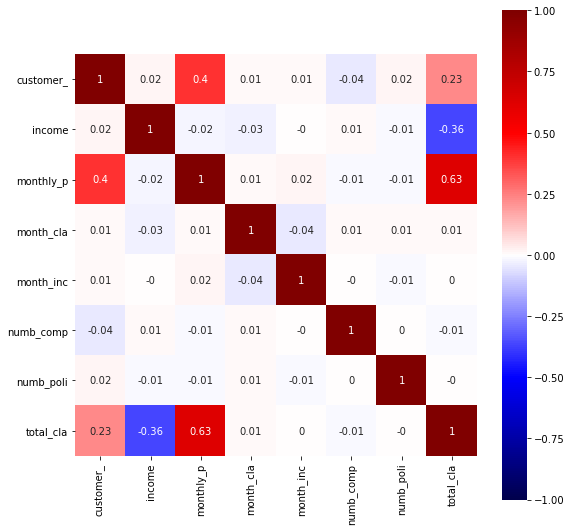

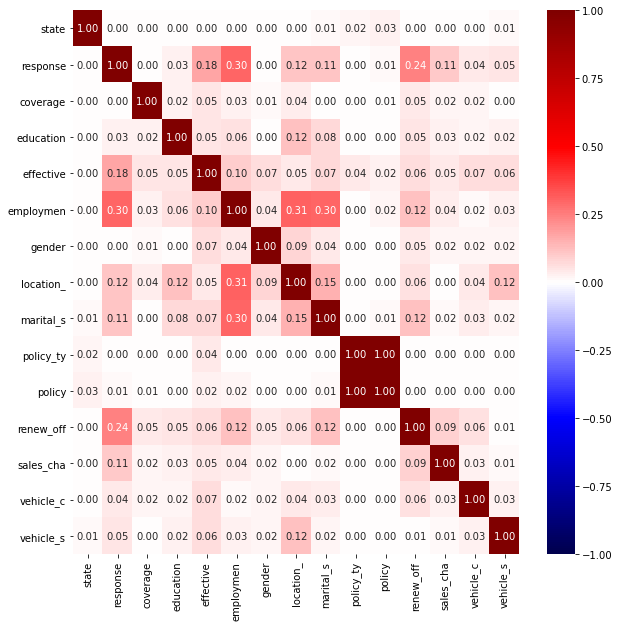

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(nums.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True,
cmap='seismic')
results = associations(cats,nominal_columns=catcols,return_results=True)

plt.show()

From the numeric heatmap we see a correlation between `customer_lifetime_value` (customer_) and `monthly_premium_auto` which makes sense.  For the moment we keep both. 
In the categorical heatmap it is clear that `policy` and `policy_type` measure absolut the same thing. We will later drop one of those. 
A very interesting feature is `employment`, it correlates positively with `response`, `marital_status`, and `location`. This would be interesting variables for feature engeneering...

Most important is the correlation between the features and our target `total_claim_amount`. From the numericals we see a strong correlaltion of `monthly_premium_auto`,`income` and `customer_lifetime_vale`. Theses should be strong features for our model.

However, this information is still missing for our categorical variables: In order to calculate this we need as mentioned eta or eta squared, as an effect-size measure for the relationship of a categorical variable and a continuous variable


<Figure size 1008x1008 with 0 Axes>

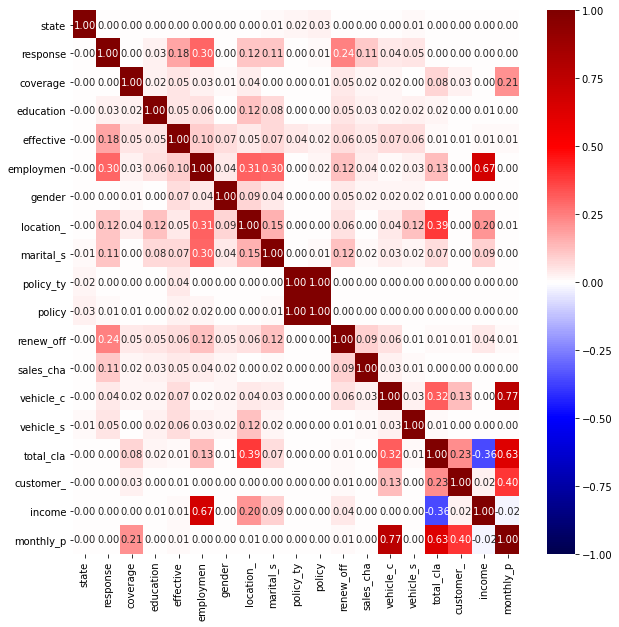

In [14]:
#generating a df for interesting looking features
cat_num = cats.copy()
cat_num[['total_cla', 'customer_', 'income', 'monthly_p']] = data[['total_cla', 'customer_', 'income', 'monthly_p']]
plt.figure(figsize =(14,14))
results = associations(cat_num,nominal_columns=catcols,return_results=True)

We have some interesting correlations between our target variable `total_claim_amount` and `location`, `vehicle class` , interesting to follow may be further `employment`, `coverage` and `marital status`.

However, unfortunately we have strong correaltion between independent variables as well. Not surprisingly we have a very strong correaltion between `income` and `employment` on the one hand, and `vehicle class` and `monthly premium` on the other hand. Lets see if we drop one of those or use them for feature engeneering. 

I would like to go even a bit further and have a look at our interesting variables and their interaction:

In [15]:
cat_num.head()

,state,response,coverage,education,effective,employmen,gender,location_,marital_s,policy_ty,policy,renew_off,sales_cha,vehicle_c,vehicle_s,total_cla,customer_,income,monthly_p
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147,2763.519279,56274,69
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935,6979.535903,0,94
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247,12887.431650,48767,108
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344,7645.861827,0,106
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879,2813.692575,43836,73


In [16]:
cat_num['location_'].value_counts()
cat_num_col = cat_num.columns

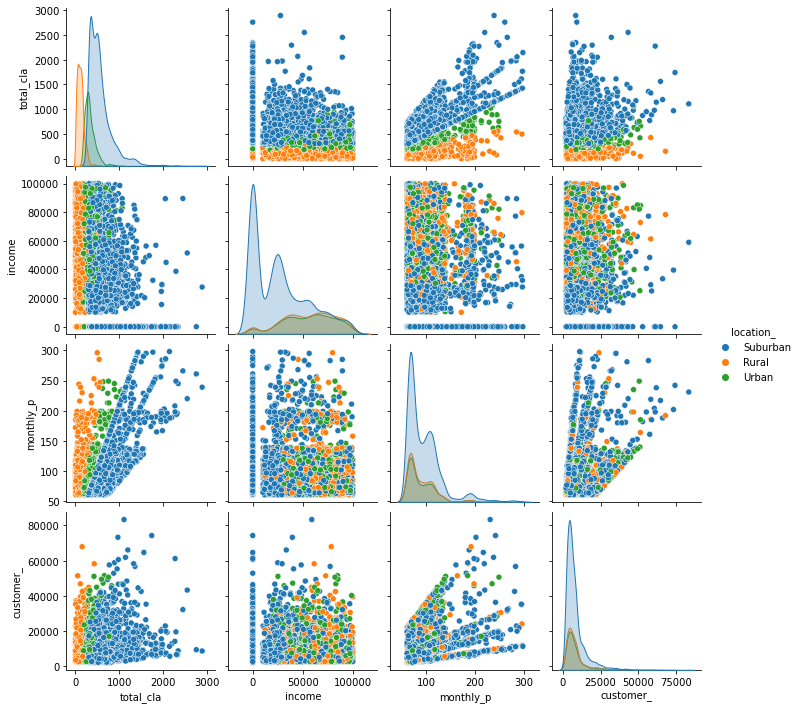

In [17]:
filtered_cat_num = cat_num[(cat_num['location_'].isin(['Suburban', 'Urban', 'Rural']))]               
#filtered_cat_num.head()
sns.pairplot(filtered_cat_num[['total_cla','income','monthly_p','customer_','location_']],hue = 'location_')

There is much information in this plot  most interesting for us is the raltonship between the features and our target `total_claim_amount`
1. There seems to be a reasonable relationship between aur target and `monthly_premium` with a clear separation regarding `location`. The total claim amount is clearly lowest in rural areas, and highest in suburban areas
2. looking at `income` it is evident that this feature is highly stacked at 0
3. as stated before, `monthly_premium` and `cusomer_lifetime_value` are highly correlated, with no clear separation regarding location
4. low income mostly occurs in suburban locations, 0 income is almost exclusively stacked for suburban locations. This in combination with the correlation of `employment` status indicates that the zeros are not missing values, but rather zero income.

## 1.6 Analysis of features on target

We already covered the topic when analyzing the correlation of some interesting looking features. Now we try to plot all of them to make sure we do not miss anything.

### 1.6 Numericals

We plot for each and every variable a scatterplot with the target on the y axis. The scatterplot allows us to set a hue, as we have seen already in the pairplot above. This time we choose another intersting categorical. The second best as stated in the correlation analysis has been `vehicle class`. For this we add this categorical feature to the nums dataset

In [18]:
nums['vehicle_c'] = data['vehicle_c']
nums.head()

,customer_,income,monthly_p,month_cla,month_inc,numb_comp,numb_poli,total_cla,vehicle_c
0,2763.519279,56274,69,32,5,0,1,384.811147,Two-Door Car
1,6979.535903,0,94,13,42,0,8,1131.464935,Four-Door Car
2,12887.431650,48767,108,18,38,0,2,566.472247,Two-Door Car
3,7645.861827,0,106,18,65,0,7,529.881344,SUV
4,2813.692575,43836,73,12,44,0,1,138.130879,Four-Door Car


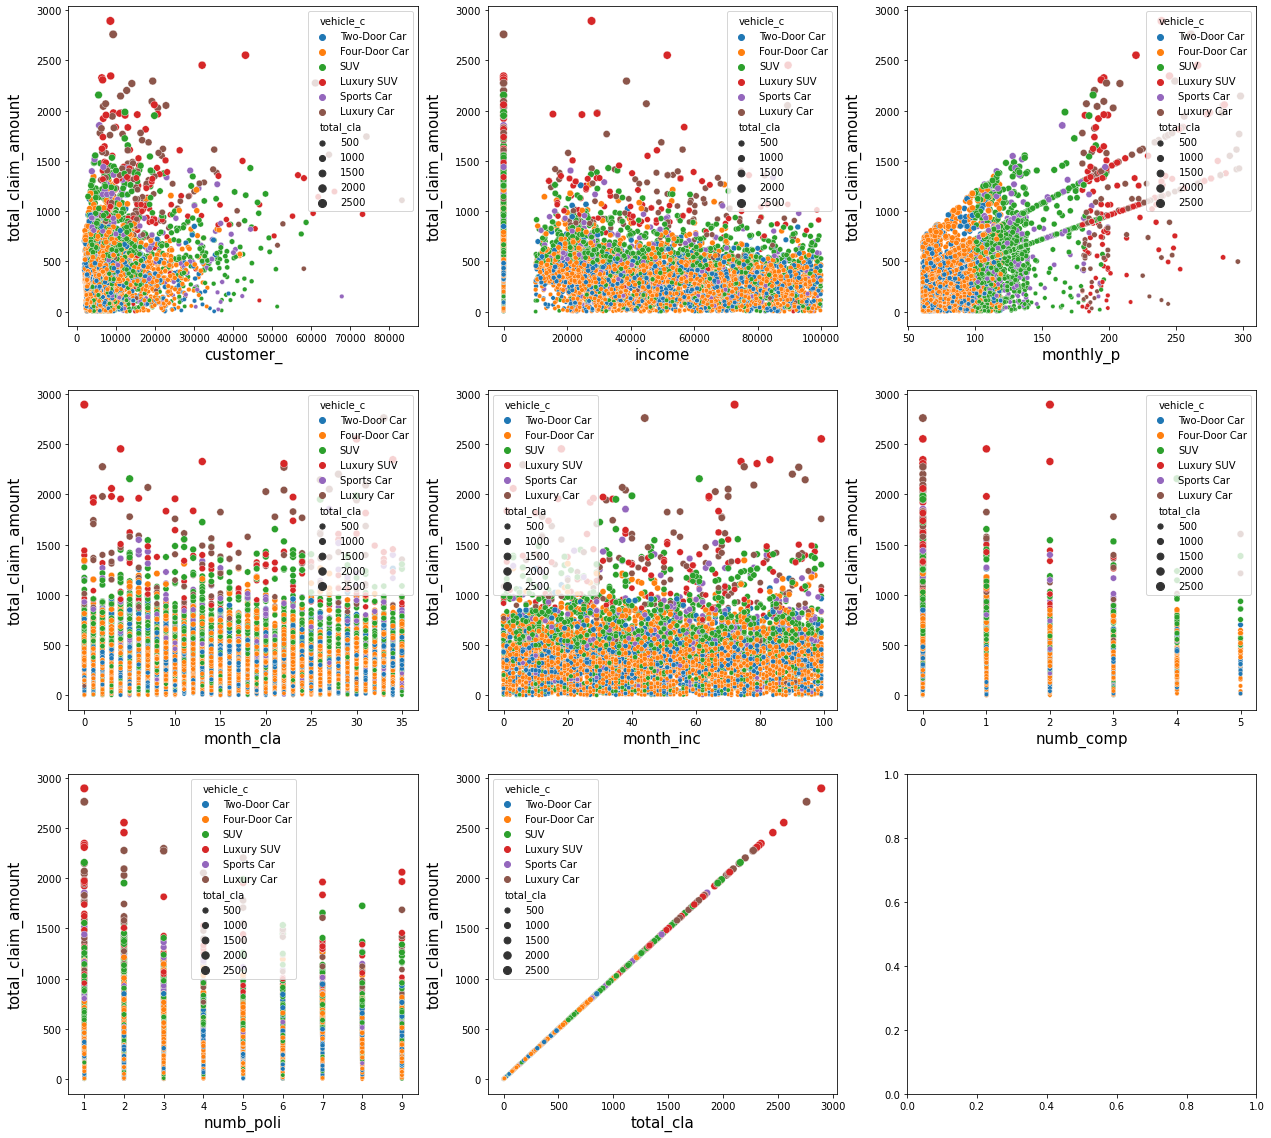

In [19]:
#NUMERICALS

fig,axs = plt.subplots(ncols=3, nrows=3, figsize =(12, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(numcols, 1):    
    plt.subplot(3, 3, i)
    sns.scatterplot(x=feature, y='total_cla', hue='vehicle_c', cmap = 'seismic', size='total_cla', data=nums)
    plt.xlabel('{}'.format(feature), size=15)
    plt.ylabel('total_claim_amount', size=15, labelpad=12.5)
plt.show() 

Lo

The features `months since last claim`, `number of complaints` and `number of policies` are rather of categorical nature - most likely ordinal categoricals - we will have a look at that.
When it comes to the relationship of the numericals with our target there are no surprises here, we see the same as before.
Interesting though is the realtionship of the `vehicle_class` to our target. as shown in alle graphs the claim amount is highest for luxury SuV's and Sportscars, and its lowest for Two and Four doored cars. Further wee see a strong relationship between `monthly premium` and `vehicle_class` a pattern we recognized before as well.

In [20]:
#categoricals = data.select_dtypes(include='object')
#categoricals_col = data.select_dtypes(include='object').columns
#cat_col = ['state', 'response', 'coverage', 'education',
#       'effective_to_da', 'employmentstatu', 'gender', 'location_code',
#       'marital_status', 'policy_type', 'policy', 'renew_offer_typ',
#       'sales_channel', 'vehicle_class', 'vehicle_size']

cats_y = cats.copy()
cats_y['total_cla'] = data['total_cla']
cats_y.head()

,state,response,coverage,education,effective,employmen,gender,location_,marital_s,policy_ty,policy,renew_off,sales_cha,vehicle_c,vehicle_s,total_cla
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


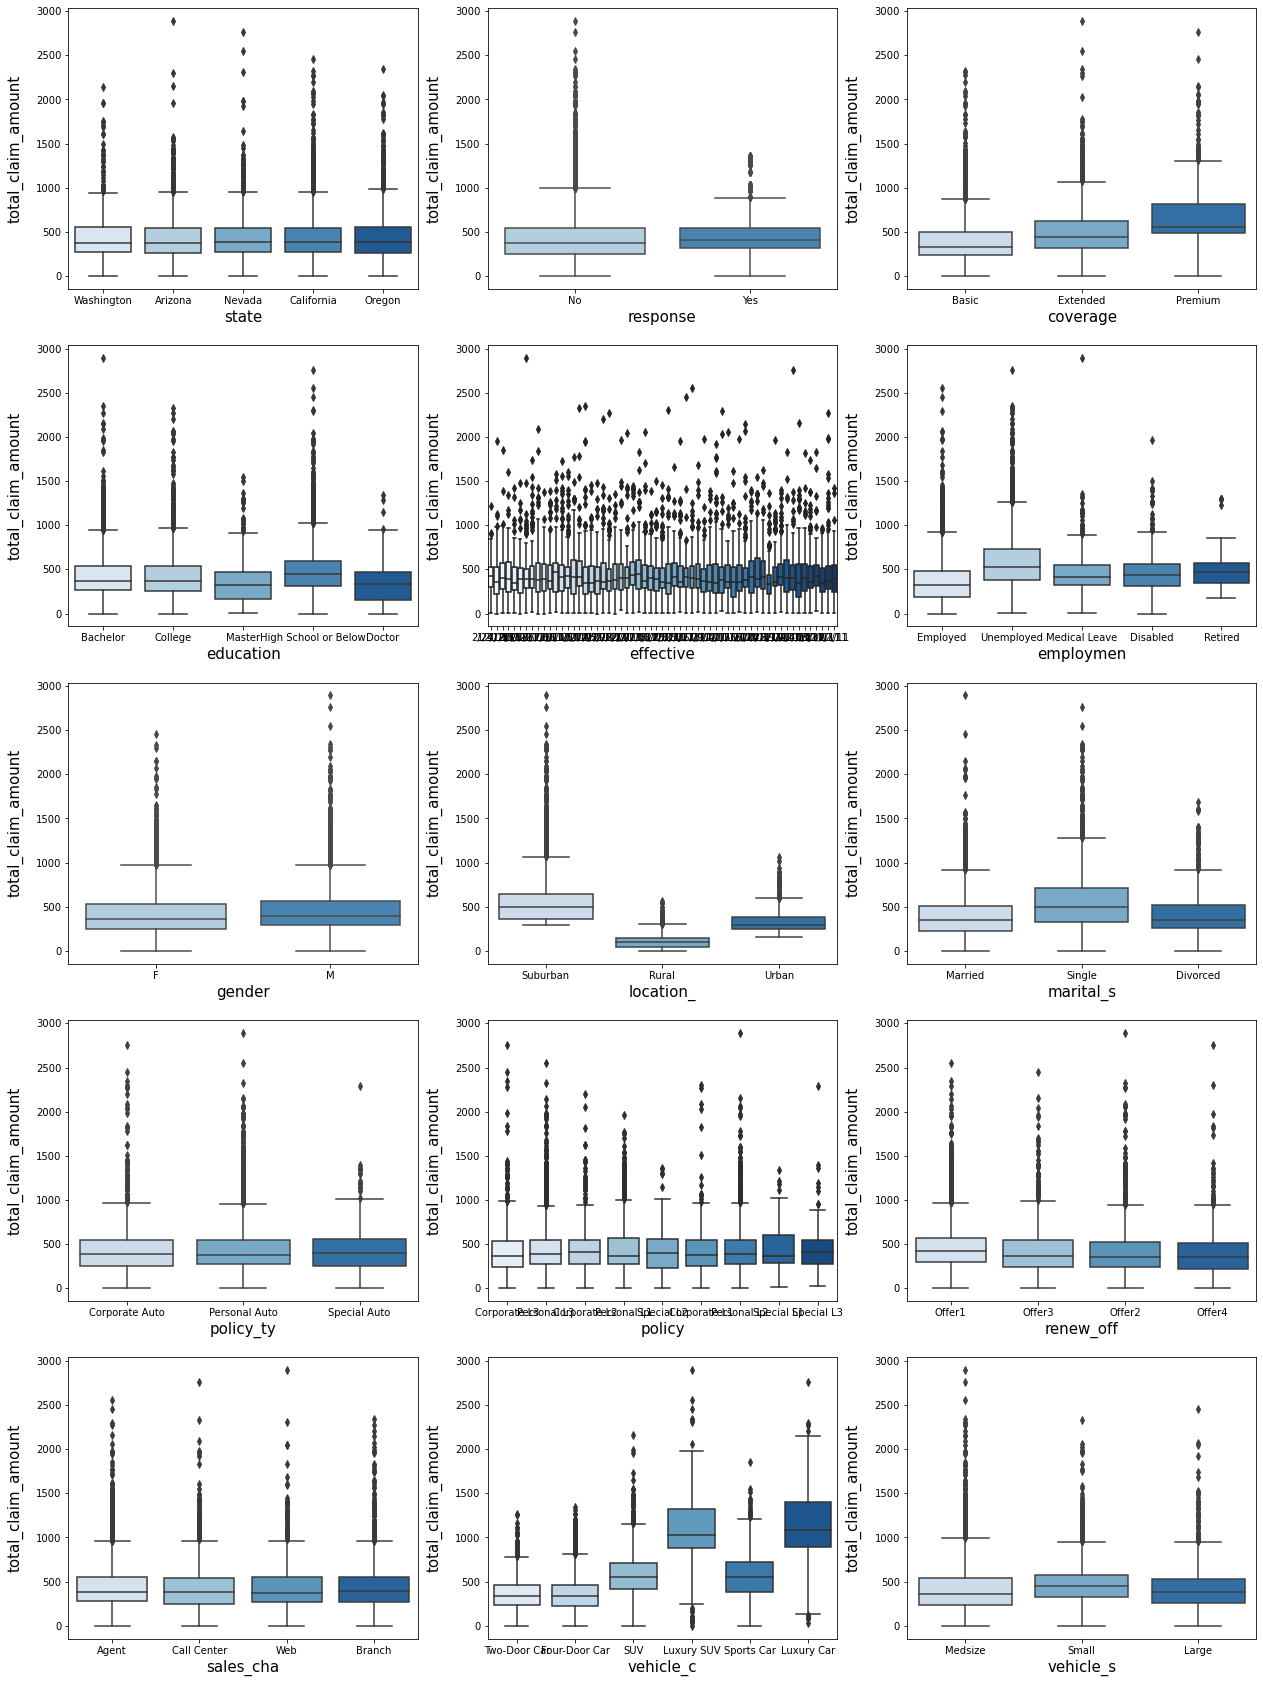

In [21]:
#CATEGORICALS

fig,axs = plt.subplots(ncols=3, nrows=5, figsize =(12, 30))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(catcols, 1):    
    plt.subplot(5, 3, i)
    sns.boxplot(x=feature, y='total_cla',palette='Blues', data=cats_y)
    plt.xlabel('{}'.format(feature), size=15)
    plt.ylabel('total_claim_amount', size=15, labelpad=12.5)
plt.show()

#sns.boxplot(y="cutomerl", data=data)
#plt.show()

From all categoricals most interesting are not surprisingly `vehicle class`, `location` and `coverage` (was low at the correlation matrix). Further interesting are `employment`, `marital starus` and `education`

## 1.7 Conclusions of data exploration

There ae plenty more things to do, namley the following:
1) Format the time related feature and process it for feature engeneering. However, the problem is that the question remains what is efective to date, as we have no idea when the data was collected.
2)  we could further look at the other ordinal distributed variables (apart from `vehicle_class`), but it does not seem that promissing
3) we could split up `id` and see if this gives us any furhter information

For the moment however, we aim to run a first model with the following variables  
1) numericals:`customer_lifetime_value`, `monthly_premium`, `income`  
2) categoricals: `vehicle class`, `location`,`coverage` `employment`, `marital starus`,`education`  

Problems with the variable selection:
1) we have a very high correlation between `vehicle_class` and `monthly_premium` of 0,77  
2) further we have a high correlation between `income` and `employment` of 0,67
3) vehicle class is an ordinal variable - we should use ordinal or Label Encoder here and make sure the right sequence is mantained

# 2 Feature engeneering and data manipulation

## 2.1 Outliers
From data exploration we have already seen that we have some  oultiers regarding our target variable `total_claim_amount` ( (see numerical graph total_cl vs. total_cl). Above a treshhold of 2400 there are only 4 rows, as in the filtered data below shows. Looking at the data however there is nothing westrange about it and the other values are consitent with the values in `total_claim_amount`. As with some luck we might be able to preict these vlaues as well we keep these values for the moment

In [22]:
data_f= data[(data['total_cla'] > 2400)] 
data_f.head()

,id,state,customer_,response,coverage,education,effective,employmen,gender,income,location_,marital_s,monthly_p,month_cla,month_inc,numb_comp,numb_poli,policy_ty,policy,renew_off,sales_cha,total_cla,vehicle_c,vehicle_s
888,BZ65376,Arizona,8581.278701,No,Extended,Bachelor,1/18/11,Medical Leave,M,27689,Suburban,Married,239,0,72,2,1,Personal Auto,Personal L2,Offer2,Web,2893.239678,Luxury SUV,Medsize
4930,IV94496,Nevada,43217.216110,No,Extended,High School or Below,1/27/11,Employed,M,51504,Suburban,Single,220,30,99,0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize
5074,ZD75163,Nevada,9295.411150,No,Premium,High School or Below,2/14/11,Unemployed,M,0,Suburban,Single,261,33,44,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize
9049,UZ14076,California,32104.699570,No,Premium,High School or Below,2/16/11,Employed,F,89546,Suburban,Married,266,4,18,1,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large


## 2.2. Transformation and skewness

Especially our target variable has a strogn skew of 1.7. In order to deal with that we try  a log transformation and a boxcox trasformation and look which one provides the better results

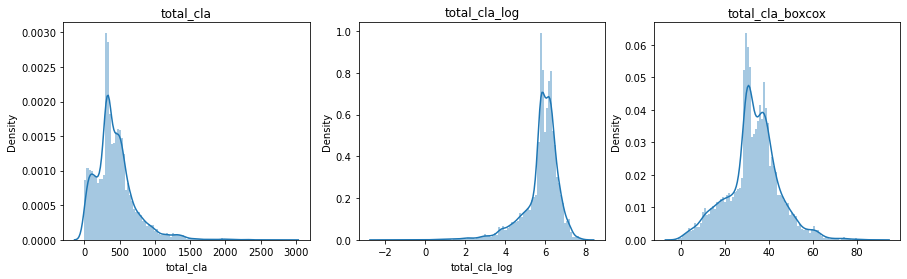

In [23]:
from scipy import stats
def feat_log_box(df, feature, bins):
    """makes a log Transformation and a boxcox transformation of a feature of a dataframe. \n
    0 values are replaced with the mean in the transformation: \n
    plots 3 distplots next to each other for comparison \n
    tales 3 arguments (df, feature, bins)"""
    df[feature+'_log'] = list(map(lambda x: np.log(x) if np.isfinite(x) else np.NAN, df[feature]))
    df[feature+'_log'] = df[feature+'_log'].fillna(np.mean(df[feature+'_log']))
    df[feature+'_boxcox'] = np.where(df[feature]<=0,0,df[feature])
    mean = np.sum(df[feature+'_boxcox'])/len(df[df[feature+'_boxcox']>0])
    df[feature+'_boxcox'] = df[feature+'_boxcox'].replace(0,mean)
    xt, lmbda = stats.boxcox(df[feature+'_boxcox'])
    df[feature+'_boxcox'] = xt
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
    sns.distplot(df[feature], bins, ax=ax1)
    ax1.set_title(feature)
    sns.distplot(df[feature+'_log'], bins, ax=ax2)
    ax2.set_title(feature + '_log')
    sns.distplot(xt, bins, ax=ax3)
    ax3.set_title(feature + '_boxcox')
    
feat_log_box(data, 'total_cla', 100)
#keep boxcox

As shown the boxcox provides the best results, which is why we drop the original, and the log transformation. Lets have another closer look at our target variable now:

In [24]:
data.drop(['total_cla', 'total_cla_log'], axis=1, inplace = True)

In [25]:
data.head()

,id,state,customer_,response,coverage,education,effective,employmen,gender,income,location_,marital_s,monthly_p,month_cla,month_inc,numb_comp,numb_poli,policy_ty,policy,renew_off,sales_cha,vehicle_c,vehicle_s,total_cla_boxcox
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,33.035752
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,56.357614
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,40.071789
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,38.763252
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,19.560154


data Total Claim Amount - Boxcox Mean: 32.96493157022055
data Total Claim Amount- Boxcox Median: 32.99841368643318
data Total Claim Amount - Boxcox Max: 88.94853549306929
data Total Claim Amount - Boxcox Skew: 0.04691555961883165


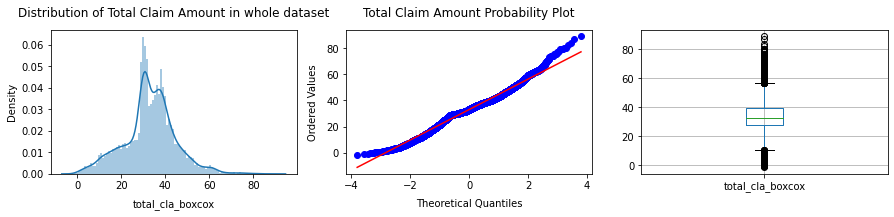

In [26]:
print('data Total Claim Amount - Boxcox Mean: {}'.format(data['total_cla_boxcox'].mean()))
print('data Total Claim Amount- Boxcox Median: {}'.format(data['total_cla_boxcox'].median()))
print('data Total Claim Amount - Boxcox Max: {}'.format(data['total_cla_boxcox'].max()))
print('data Total Claim Amount - Boxcox Skew: {}'.format(data['total_cla_boxcox'].skew()))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,2))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None)

sns.distplot(data['total_cla_boxcox'], hist=True, bins = 100, ax=ax1)
probplot(data['total_cla_boxcox'], plot=ax2)
data.boxplot('total_cla_boxcox', ax=ax3)

ax1.set_xlabel('total_cla_boxcox', size=10, labelpad=8)
ax2.set_xlabel('Theoretical Quantiles', size=10, labelpad=8)
ax2.set_ylabel('Ordered Values', size=10, labelpad=8)

ax1.set_title('Distribution of Total Claim Amount in whole dataset', size=12, y=1.05)
ax2.set_title('Total Claim Amount Probability Plot', size=12, y=1.05)

plt.show()

As shown the mean and the median are almost identical, the skew is at 0.04, the cuve is almost symetrical.  
  
We do have three more nuerical features, whoch we can transform. However, we definitely shouldn't transform income, as null values are put to NaN and then later replaced by the mean. In our case this is not recommended, as we argue that people with zero income are unemployed.

Lets verify that by filtering the data


In [27]:
data['employmen'].value_counts()
#data['income'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmen, dtype: int64

In [28]:
data_inc_unempl = data[(data['employmen'].isin(['Unemployed'])) & (data['income'] == 0)]
#data[(data['target_d']<100) & (data['gender']=='F')]
data_inc_unempl.shape

(2317, 24)

So, every single person in this dataset with 0 income is as well unemployed. This is further confirmed by the plot below. What"s even more important, looking at the scatterplot it is hardly possible to draw a regression line between income and 'total_claim_amount', in other words, everything is already explained by the `income`, `emloyment` has no further value for us; we drop it. 

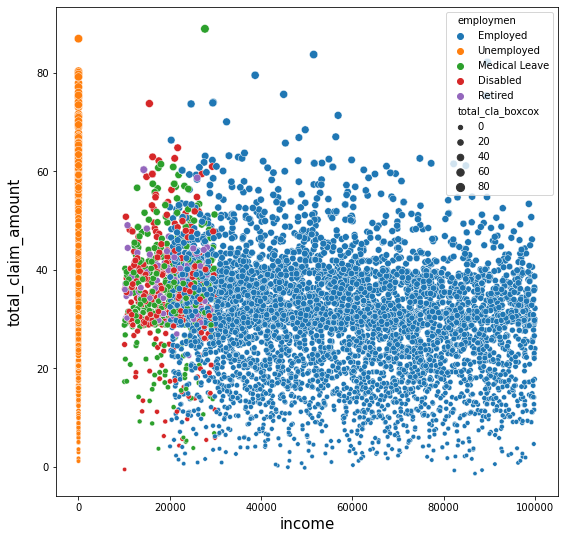

In [29]:
fig,axs = plt.subplots(figsize =(9, 9))
sns.scatterplot(x='income', y='total_cla_boxcox', hue='employmen', cmap = 'seismic', size='total_cla_boxcox', data=data)
plt.xlabel('{}'.format('income'), size=15)
plt.ylabel('total_claim_amount', size=15, labelpad=12.5)
plt.show()

therefore it is obvious that we do only transform our other two numerical features, if necessary, namely `customer_lifetime_value` and `monthly_premium`

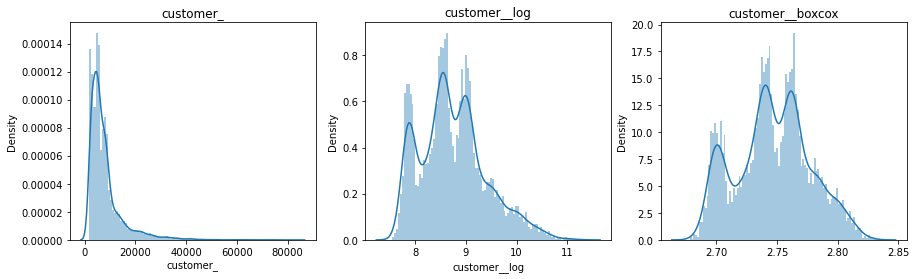

In [30]:
feat_log_box(data, 'customer_', 100)


In [31]:
data.drop(['customer_', 'customer__log'], axis=1)

,id,state,response,coverage,education,effective,employmen,gender,income,location_,marital_s,monthly_p,month_cla,month_inc,numb_comp,numb_poli,policy_ty,policy,renew_off,sales_cha,vehicle_c,vehicle_s,total_cla_boxcox,customer__boxcox
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,33.035752,2.703839
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,56.357614,2.754926
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,40.071789,2.780772
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,38.763252,2.759125
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,19.560154,2.704995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,23.588905,2.801170
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,32.792951,2.711030
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,47.263726,2.762062
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,44.225147,2.758397


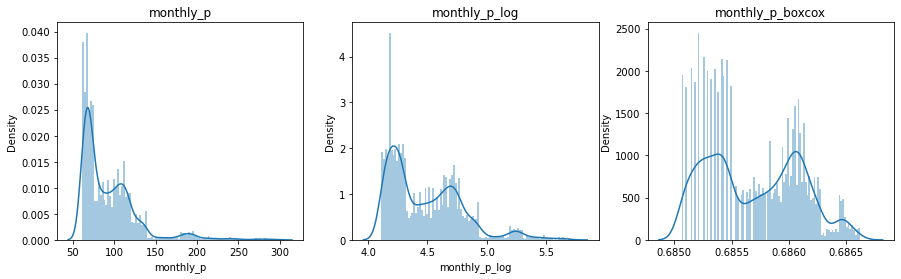

In [32]:
feat_log_box(data, 'monthly_p', 100)

When it comes to monthly premium we use the log transfprmation and drop the original feature and the boxcox

In [33]:
data.drop(['monthly_p', 'monthly_p_boxcox'], axis=1)

,id,state,customer_,response,coverage,education,effective,employmen,gender,income,location_,marital_s,month_cla,month_inc,numb_comp,numb_poli,policy_ty,policy,renew_off,sales_cha,vehicle_c,vehicle_s,total_cla_boxcox,customer__log,customer__boxcox,monthly_p_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,33.035752,7.924260,2.703839,4.234107
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,56.357614,8.850738,2.754926,4.543295
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,40.071789,9.464008,2.780772,4.682131
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,38.763252,8.941920,2.759125,4.663439
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,19.560154,7.942253,2.704995,4.290459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,23.588905,10.060747,2.801170,4.290459
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,32.792951,8.038031,2.711030,4.369448
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,47.263726,9.007476,2.762062,4.442651
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,44.225147,8.925912,2.758397,4.564348


Our numerical variables for data_1 for the model are:

In [34]:
data_1_nums = pd.DataFrame()
data_1_nums[['cust_lt_bx','month_pr_log', 'income', 'total_ca_bx']] =data[['customer__boxcox', 'monthly_p_log', 'income', 'total_cla_boxcox']]
data_1_nums.head()

,cust_lt_bx,month_pr_log,income,total_ca_bx
0,2.703839,4.234107,56274,33.035752
1,2.754926,4.543295,0,56.357614
2,2.780772,4.682131,48767,40.071789
3,2.759125,4.663439,0,38.763252
4,2.704995,4.290459,43836,19.560154


## 2.3 Encoding 
### 2.3.1 Ordinal label encoder with pandas 
First of all lets generate a new dataframe for all the categorical variables and copy them from data.

In [35]:
data_1_cats = pd.DataFrame()
data_1_cats[['vehicle_c','location', 'coverage', 'marital_s', 'education']] =data[['vehicle_c', 'location_', 'coverage', 'marital_s', 'education']]
data_1_cats.head()

,vehicle_c,location,coverage,marital_s,education
0,Two-Door Car,Suburban,Basic,Married,Bachelor
1,Four-Door Car,Suburban,Extended,Single,Bachelor
2,Two-Door Car,Suburban,Premium,Married,Bachelor
3,SUV,Suburban,Basic,Married,Bachelor
4,Four-Door Car,Rural,Basic,Single,Bachelor


From our chosen categories the majority is actually of ordinal nature:    
1) vehicle_class as mentioned will be encoded using 3 labels   
2) coverage will be encoded with 1:basic, 2:extended, 3:premium  
3) education will be encoded with 1:School or below, 2: College, 3: Bachelor, 4: Master, 5: Doktor  

Due to the fact that we are talking about ordinal data, the order in which the values of each category are encoded actually matters - at lease in theory. Practically speaking we do not know if it makes a difference in the model.

Label Encoder and Ordinal Encoder from scikit learn both encode automatically, for the moment we could not figure out how to tell the encoder what is the sequence of lables. Therefore we used pandas Categorical to define a sequenece of ordinal categorical labels, and then factorize them.

In [36]:
data_1_cats['vehicle_c'].value_counts()
data_1_cats['coverage'].value_counts()
data_1_cats['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [37]:
#Defining ordered calues for each category using pandas Categorical
ordcat_vehicle_c = pd.Categorical(data_1_cats['vehicle_c'], categories=['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car'], ordered=True)
ordcat_coverage = pd.Categorical(data_1_cats['coverage'], categories=['Basic', 'Extended', 'Premium'], ordered=True)
ordcat_education = pd.Categorical(data_1_cats['education'], categories=['High School or Below', 'College', 'Bachelor', 'Master', 'Docotr'], ordered=True)


In [38]:

#enc = OrdinalEncoder()
#enc.fit_transform(data_1_cats[['vehicle_c', 'coverage', 'education']])
#data_1_cats.head()

In [39]:
#Factoizing them with pandas factorizer
lab_vehicle_c, unique = pd.factorize(ordcat_vehicle_c, sort=True)
data_1_cats['vehicle_c'] = lab_vehicle_c
lab_coverage, unique = pd.factorize(ordcat_coverage, sort=True)
data_1_cats['coverage'] = lab_coverage
lab_education, unique = pd.factorize(ordcat_education, sort=True)
data_1_cats['education'] = lab_education

In [40]:
data_1_cats.head(20)

,vehicle_c,location,coverage,marital_s,education
0,0,Suburban,0,Married,2
1,1,Suburban,1,Single,2
2,0,Suburban,2,Married,2
3,2,Suburban,0,Married,2
4,1,Rural,0,Single,2
5,0,Rural,0,Married,2
6,1,Suburban,0,Married,1
7,1,Urban,2,Single,3
8,1,Suburban,0,Divorced,2
9,1,Urban,1,Married,1


### 2.3.2 OneHotEncoder

In [41]:
type(data_1_cats)

pandas.core.frame.DataFrame

In [42]:
enc = OneHotEncoder(handle_unknown='error', drop='first')
enc_data_1_cats = pd.DataFrame(enc.fit_transform(data_1_cats[['location', 'marital_s']]).toarray())
data_1_cats = data_1_cats.join(enc_data_1_cats)
data_1_cats

,vehicle_c,location,coverage,marital_s,education,0,1,2,3
0,0,Suburban,0,Married,2,1.0,0.0,1.0,0.0
1,1,Suburban,1,Single,2,1.0,0.0,0.0,1.0
2,0,Suburban,2,Married,2,1.0,0.0,1.0,0.0
3,2,Suburban,0,Married,2,1.0,0.0,1.0,0.0
4,1,Rural,0,Single,2,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9129,1,Urban,0,Married,2,0.0,1.0,1.0,0.0
9130,1,Suburban,1,Divorced,1,1.0,0.0,0.0,0.0
9131,1,Suburban,1,Single,2,1.0,0.0,0.0,1.0
9132,1,Suburban,1,Married,1,1.0,0.0,1.0,0.0


In [43]:
data_1_cats.drop(['location', 'marital_s'], axis = 1, inplace = True)
data_1_cats.head()

,vehicle_c,coverage,education,0,1,2,3
0,0,0,2,1.0,0.0,1.0,0.0
1,1,1,2,1.0,0.0,0.0,1.0
2,0,2,2,1.0,0.0,1.0,0.0
3,2,0,2,1.0,0.0,1.0,0.0
4,1,0,2,0.0,0.0,0.0,1.0


## 2.4 Skaling Data

In [44]:
#normalize numericals
transformer = Normalizer().fit(data_1_nums)
data_1_normalized = transformer.transform(data_1_nums)
print(data_1_normalized.shape)

(9134, 4)


In [45]:
data_1_norm = pd.DataFrame(data_1_normalized, columns = data_1_nums.columns)
#X = np.concatenate((data_1_normalized, data_1_cats), axis=1)
#Y = data['TARGET_D']
data_1_norm.head()

,cust_lt_bx,month_pr_log,income,total_ca_bx
0,0.000048,0.000075,1.0,0.000587
1,0.048667,0.080260,0.0,0.995585
2,0.000057,0.000096,1.0,0.000822
3,0.070493,0.119147,0.0,0.990371
4,0.000062,0.000098,1.0,0.000446


In [46]:
type(data_1_cats)
data_1_cats.head()

,vehicle_c,coverage,education,0,1,2,3
0,0,0,2,1.0,0.0,1.0,0.0
1,1,1,2,1.0,0.0,0.0,1.0
2,0,2,2,1.0,0.0,1.0,0.0
3,2,0,2,1.0,0.0,1.0,0.0
4,1,0,2,0.0,0.0,0.0,1.0


In [47]:
data_1_full = pd.concat([data_1_norm, data_1_cats], axis =1)
data_1_full.head()

,cust_lt_bx,month_pr_log,income,total_ca_bx,vehicle_c,coverage,education,0,1,2,3
0,0.000048,0.000075,1.0,0.000587,0,0,2,1.0,0.0,1.0,0.0
1,0.048667,0.080260,0.0,0.995585,1,1,2,1.0,0.0,0.0,1.0
2,0.000057,0.000096,1.0,0.000822,0,2,2,1.0,0.0,1.0,0.0
3,0.070493,0.119147,0.0,0.990371,2,0,2,1.0,0.0,1.0,0.0
4,0.000062,0.000098,1.0,0.000446,1,0,2,0.0,0.0,0.0,1.0


## 2.5 Feature generation and combination

The generation of a new feature using emloyment and income was not nessecary, as the  influence on our target variable seems to be perfectly descibed by income alone. however, this is something to keep in mind to later improove the model using feature engeneering

`Monthly_premium` and `vehicle_class` seem to influence our target siginificantly, but show a strong correlation 

We generate different datasets:  
data_1_full - both variables included as we did above  
data_2_full - drop `monthly_premium`  
data_3_full - drop `vehicle_vlass`  


In [48]:
data_2_full = data_1_full.drop(['month_pr_log'], axis =1)
data_3_full = data_1_full.drop(['vehicle_c'], axis =1)                              

# 3. Model 

for the linear Regression model we first of all define Y to be the total_ca_bx (bx as we did a boxcox to it to remove the skew and be better normally distributed), drop the target variable from X and  split the dataset 70/30.

Then run the linear regression model

In [49]:
Y_1 = data_1_full['total_ca_bx']
X_1 = data_1_full.drop(['total_ca_bx'], axis=1)

Y_2 = data_2_full['total_ca_bx']
X_2 = data_2_full.drop(['total_ca_bx'], axis=1)

Y_3 = data_3_full['total_ca_bx']
X_3 = data_3_full.drop(['total_ca_bx'], axis=1)

In [50]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, Y_1, test_size=0.3, random_state=0)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y_2, test_size=0.3, random_state=0)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, Y_3, test_size=0.3, random_state=0)

In [51]:
lm = linear_model.LinearRegression()
lr_1 = lm.fit(X_1_train,y_1_train)
predictions_1  = lm.predict(X_1_test)
r2_score(y_1_test, predictions_1)

0.9993651931045878

In [52]:
lr_2 = lm.fit(X_2_train,y_2_train)
predictions_2  = lm.predict(X_2_test)
r2_score(y_2_test, predictions_2)

0.9992689408452538

In [53]:
lr_3 = lm.fit(X_3_train,y_3_train)
predictions_3  = lm.predict(X_3_test)
r2_score(y_3_test, predictions_3)

0.9993658214053018

# 4. Model Validation

We wrote a function to have all validation measures in one function, which stores the values in a dataframe.

In [54]:
model_val = pd.DataFrame(columns =['Model', 'r-square', 'adjusted r','MSE', 'RMSE'])
model_val.head()

,Model,r-square,adjusted r,MSE,RMSE


In [55]:
def model_validation (modelname, X_test, y_test, predictions):
    global model_val
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    n = len(X_test) 
    p = X_test.shape[1]
    adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
    
    val_list = [modelname, r2, adj_r2, mse, rmse]
    v_series = pd.Series(val_list, index = model_val.columns)
    model_val = model_val.append(v_series, ignore_index=True)

model_validation ('lr_1', X_1_test, y_1_test, predictions_1)
model_validation ('lr_2', X_2_test, y_2_test, predictions_2)
model_validation ('lr_3', X_3_test, y_3_test, predictions_3)
model_val

,Model,r-square,adjusted r,MSE,RMSE
0,lr_1,0.999365,0.999363,0.000118,0.010845
1,lr_2,0.999269,0.999267,0.000135,0.011638
2,lr_3,0.999366,0.999364,0.000117,0.010839


Ok, our first regression model has a r-square of 0,999365, or in other words 99,93% of the test data is explained by the regression model, the RMSE, which is the standard deveation of the error is at 0.018, the MSE, which represents the variance of the error is at 0,000117 (!!!). Even if we take ito account that we did a boxcox to the target variable (lowers the values about a factor 10 in this case) we can predict the future_claim_amount of a customer to the Euro exactly, with an error in cents!!!!

###  <center > WE NAILED IT!!!!</center>  
  
 <center > DID WE?</center>  
   
Do we have some serious target leakage here?
Hopefully this is an exercise designed for learning purpose... because otherwise this is not reasonable...

maybe run some more models...

# 5. Conclusions

running three different models showed that the best model is the on with only `monthly_premium` in it, `vehilce_class` gave much to the predictive power of the model. As wel we could see that the correlion we observed lead to a slighly lower performance of our fist model, alhtough it had on emore feature.

Generally speaking the accuracy of the model is unbelievably high - this has to be confirmed.

Further things that might be of interest:
1) the same thing we could execute with income and employment status
2) let's see how the model performs without Transformator
3) let's see how the model performs with Standard scaler
4) let's see if we can do some feature engineering with two variables
